
# <h1><center> <font color='red'> Trajectoire d'un lanceur </font> </h1>

<center> Léa MICHEL (ONERA/DTIS) </center>
<center> Sous la direction de Brieuc DANET (ONERA/DTIS) </center>
<center> Juillet 2020 </center>

Le module trajectoire est réalisé en une analyse comportant 5 entrées et 7 sorties.

Les calculs sont inspirés de :
>- Cours de Monsieur Yves BLIN, enseignant à l’école ELISA Aerospace 


Soit $M \\[20pt] $ le point de largage. Afin de simplifier les calculs, nous considérons que l'impulsion est instantanée.

En entrée, nous avons : 
- ${V_1}$ - Vitesse initiale
- ${\Delta V}$ - Incrément de vitessse apporté par l'impulsion
- ${\alpha}$ - Angle de largage
- ${\gamma}$ - Pente vitesse sur la nouvelle orbite au point M
- ${\mu}$ - Constante gravitationnelle standard
- ${r_M}$ - Altitude de largage + rayon terre 

En sortie, nous obtenons les paramètres de l'orbite atteinte :
- ${a}$ - Demi grand axe
- ${e}$ - Excentricité
- ${h}$ - Energie 
- ${p}$ - Paramètre de l'orbite
- ${r_a}$ - Rayon à l'apogée
- ${r_p}$ - Rayon au périgée
- ${V_2}$ - Vitesse au point M


![image.png](./Images/WO.png)

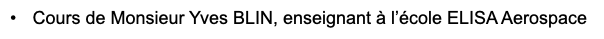

## <font color='red'> Calculs </font>

![image.png](./Images/alpha.png)

<font color='blue'> $1^{er} cas : \alpha = 0$ </font>

Soit $M$ le point de largage, à une altitude $z_M + r_T$.

${\Delta V}$ est aligné avec le vecteur vitesse $V_1$.

Conclusion : l'apogée augmente mais pas le périgée.


![image.png](./Images/alphanon0.png)

<font color='blue'> $2^{ème} cas : \alpha \neq 0 $ </font>

Soit $V_1$ la vitesse initiale et $\Delta V$ l'impulsion de vitesse avec une pente ${\alpha}$.

Nous obtenons le vecteur vitesse $V_2$ qui est la vitesse du lanceur après l’impulsion dans la nouvelle orbite.

La pente de vitesse gamma est l'angle avec l’horizontale locale.


### Calcul de $V_2 $ 
<center>
$\overrightarrow{\mid\Delta V \mid}= f(V_1,V_2,\alpha) \\[20pt] $ 
    
<center>
${{V_2}^2} = (V_1 + \Delta V cos(\alpha))^2+ (\Delta V sin(\alpha))^2 \\[20pt] $ 

<center>
${{V_2}^2} = V_1^2+ 2\Delta V*V_1cos(\alpha) + \Delta V ^2(cos^2(\alpha) + sin^2(\alpha))  \\[20pt] $ 
    
<center>
${{V_2}^2} = V_1^2 + \Delta V ^2 + 2\Delta V * V_1 * cos(\alpha)  \\[20pt] $ 
        
<center>
${V_2} = \sqrt[2]{V_1^2 + \Delta V ^2 + 2\Delta V * V_1 * cos(\alpha)}  \\[20pt] $ 
    
<center>
$\frac{V_2^2} {2} - \frac{\mu} {r_M} = \frac{-\mu} {2a} \\[20pt] $ 
    
<center>
$\frac{V_2^2 r_M - 2\mu} {2r_M} = \frac{-\mu} {2a} \\[20pt] $ 
   

### Calcul de $ a $     
<center>
$a = \frac{r_M \mu} {2\mu - V_2^2 r_M} \\[20pt] $


 

### Calcul de $ h $   
<center>
$ h = r_M * V_2 *cos(\gamma) = cst \\[20pt] $

### Calcul de $\gamma $

![image.png](./Images/SchemaGamma.png)

<center>
$\mid\mid \overrightarrow{a} \mid\mid = \mid\mid \overrightarrow{V_1} \mid\mid \\[20pt] $

<center>
$\mid\mid \overrightarrow{b} \mid\mid = \mid\mid \overrightarrow{\Delta V} \mid\mid \\[20pt] $

<center>
$\mid\mid \overrightarrow{c} \mid\mid = \mid\mid \overrightarrow{V_2} \mid\mid \\[20pt] $

<center>
$ b^2 = a^2 +c^2 -2ac * cos(\gamma) \\[20pt] $

<center>
$ cos(\gamma) = \frac {a^2+c^2-b^2}{2ac}\\[20pt] $

<center>
$ cos(\gamma) = \frac {V_1^2+V_2^2-\Delta v^2}{2V_1V_2}\\[20pt] $

<center>
${\gamma}= arccos (\frac {V_1^2+V_2^2-\Delta V^2}{2V_1V_2})\\[20pt] $

### Calcul de $ p $     
 
<center>
$ p = \frac{r_M^2 V_2^2 cos^2(\gamma)} {\mu} = \frac{h^2} {\mu} \\[20pt] $
    

### Calcul de $ e $    
<center>
$ p = a (1 - e^2) => e = \sqrt[2]{1 - \frac{p}{a}} \\[20pt] $


### Calcul de $ r_p $  
<center>
$ r_p = a (1 - e) \\[20pt] $

### Calcul de $ r_a $ 
<center>
$ r_a = a (1 + e) \\[20pt] $

## <font color='red'> Paramètres </font>

Il est possible de modifier les paramètres ci dessous :

In [1]:
def initialize(mda):

    mda['alpha'] = 0 # en degrès
    mda['DeltaV'] = 10 # en km/s
    mda['mu'] = 398600 # en km/s^-2
    mda['r_M'] = 6388.0 # R_t + 10 km 
    mda['V1'] = 0.1797 # en km/s

## <font color='red'> Résultat </font>

In [2]:
# -*- coding: utf-8 -*-
"""
  run_analysis.py generated by WhatsOpt 1.9.4
"""
# DO NOT EDIT unless you know what you are doing
# analysis_id: 735

from openmdao.api import Problem
#from run_parameters_init import initialize
from trajectory_version2 import TrajectoryVersion2 

pb = Problem(TrajectoryVersion2())
pb.setup()  

initialize(pb)

pb.run_model()   
#pb.model.list_inputs(print_arrays=False)

Unable to import mpi4py. Parallel processing unavailable.
NL: NLBGS Converged in 1 iterations


In [3]:
pb.model.list_outputs(print_arrays=False)

12 Explicit Output(s) in 'model'
--------------------------------

varname       value           
------------  ----------------
model
  indeps
    alpha     [0.]            
    DeltaV    [10.]           
    mu        [398600.]       
    r_M       [6388.]         
    V1        [0.1797]        
  Trajectory
    a         [18828.35187485]
    e         [0.66072442]    
    h         [65027.9236]    
    p         [10608.7075959] 
    ra        [31268.7037497] 
    rp        [6388.]         
    V2        [10.1797]       


0 Implicit Output(s) in 'model'
-------------------------------



[('indeps.alpha', {'value': array([0.])}),
 ('indeps.DeltaV', {'value': array([10.])}),
 ('indeps.mu', {'value': array([398600.])}),
 ('indeps.r_M', {'value': array([6388.])}),
 ('indeps.V1', {'value': array([0.1797])}),
 ('Trajectory.a', {'value': array([18828.35187485])}),
 ('Trajectory.e', {'value': array([0.66072442])}),
 ('Trajectory.h', {'value': array([65027.9236])}),
 ('Trajectory.p', {'value': array([10608.7075959])}),
 ('Trajectory.ra', {'value': array([31268.7037497])}),
 ('Trajectory.rp', {'value': array([6388.])}),
 ('Trajectory.V2', {'value': array([10.1797])})]

## <font color='red'> Diagramme N2 </font>

In [4]:
from openmdao.visualization.n2_viewer.n2_viewer import n2
n2(pb, outfile='n2.html', show_browser=False, embeddable=True, title='Trajectoire')

from IPython.display import IFrame
display(IFrame(src='n2.html',width=1300,height=700))